# Gerador de instâncias sintéticas para o problema de otimização do mestrado

### Etapas

1. Dado um grid, sortear coordenada (x, y)

1. Dada a coordenada, verificar bacia

1. Pela bacia, temos a estratégia e a qualidade do dado

1. Dada a bacia, escoolher um play disponível na bacia

1. O play vai indicar se é arenito ou carbonato, range de soterramento, e distribuição dos parâmetros volumétricos

1. O risco tem componentes regionais da bacia (geração), componentes do play (migração, retenção), e componentes individuais (geometria e reservatório).

1. A PCGNA é indicada pelo play

1. Simular volume geo, tec, ambos condicionais e incondicionais

1. O custo do poço exploratório depende da bacia, estratégia e soterramento

1. Cada bacia tem uma $f(vol) \rightarrow VPL$

1. Calcular distribuição de VPL e métricas de retorno (risco?)

1. Atribuir contratos à cada parte da bacia com OEs: simular leilões?

1. Tempo de excecução dos projetos é função do soterramento e estratégia

## Importando bibliotecas

In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Definição do grid

In [2]:
x_min, x_max = (0., 100.)
y_min, y_max = (0., 100.)
dx, dy = (1., 1.)
grid = np.zeros(( int((y_max-y_min)/dy), int((x_max-x_min)/dx) ))

In [3]:
grid.shape

(100, 100)

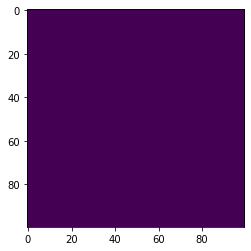

In [4]:
plt.imshow(grid)

In [5]:
nx_bacias = 3
ny_bacias = 3
bacias = {}
count = 0
x_step = (x_max-x_min)/nx_bacias
y_step = (y_max-y_min)/ny_bacias
for i in range(1, ny_bacias+1):
    y_min_curr = (i-1)*y_step
    y_max_curr = (i)*y_step
    for j in range(1, nx_bacias+1):
        x_min_curr = (j-1)*x_step
        x_max_curr = j*x_step
        count += 1
        bacias["Bacia"+str(count)] = ((x_min_curr, x_max_curr),(y_min_curr, y_max_curr))
        grid[int(x_min_curr):int(x_max_curr), int(y_min_curr):int(y_max_curr)] = count

In [6]:
bacias

{'Bacia1': ((0.0, 33.333333333333336), (0.0, 33.333333333333336)),
 'Bacia2': ((33.333333333333336, 66.66666666666667),
  (0.0, 33.333333333333336)),
 'Bacia3': ((66.66666666666667, 100.0), (0.0, 33.333333333333336)),
 'Bacia4': ((0.0, 33.333333333333336),
  (33.333333333333336, 66.66666666666667)),
 'Bacia5': ((33.333333333333336, 66.66666666666667),
  (33.333333333333336, 66.66666666666667)),
 'Bacia6': ((66.66666666666667, 100.0),
  (33.333333333333336, 66.66666666666667)),
 'Bacia7': ((0.0, 33.333333333333336), (66.66666666666667, 100.0)),
 'Bacia8': ((33.333333333333336, 66.66666666666667),
  (66.66666666666667, 100.0)),
 'Bacia9': ((66.66666666666667, 100.0), (66.66666666666667, 100.0))}

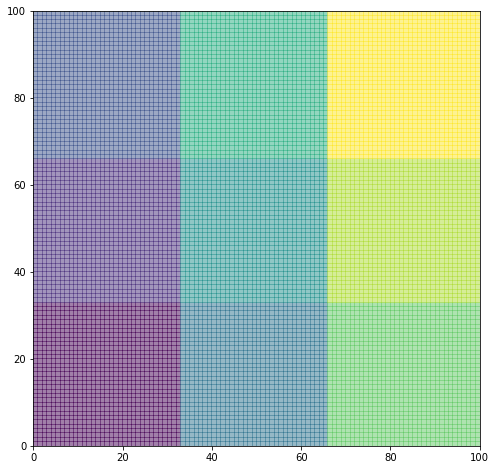

In [7]:
plt.figure(figsize=(8, 8))
plt.pcolormesh(grid, alpha=0.5, cmap=None)

In [8]:
n_projetos = 30
projetos = {}
projetos['Coordenada x'] = []
projetos['Coordenada y'] = []
projetos['Bacia'] = []
projetos['Nome'] = []

for i in range(n_projetos):
    
    # primeiro, sortear uma bacia
    bacia = np.random.choice(list(bacias.keys()))
    
    # não permitir coordenadas nas bordas das bacias
    fator = 1
    x_min_curr, x_max_curr = bacias[bacia][0]
    y_min_curr, y_max_curr = bacias[bacia][1]
    
    x_proj, y_proj = (np.random.uniform(x_min_curr*fator, x_max_curr*fator), 
                      np.random.uniform(y_min_curr*fator, y_max_curr*fator))
    
    projetos['Nome'].append("Projeto " + str(i+1))
    projetos['Bacia'].append(bacia)
    projetos['Coordenada x'].append(x_proj)
    projetos['Coordenada y'].append(y_proj)

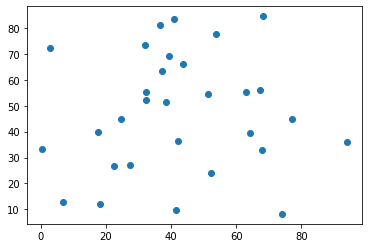

In [9]:
plt.scatter(projetos['Coordenada x'], projetos['Coordenada y'])

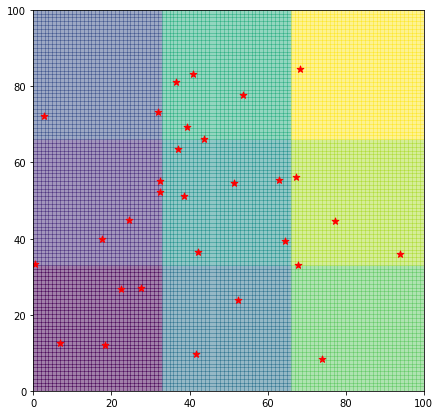

In [10]:
fig = plt.figure(figsize=(7, 7), frameon=False)

im1 = plt.pcolormesh(grid, alpha=0.5, cmap=None)
im2 = plt.scatter(projetos['Coordenada x'], projetos['Coordenada y'], c='red', s=50, marker='*')

plt.show()

In [11]:
proj_df = pd.DataFrame(projetos)

In [12]:
proj_df

,Coordenada x,Coordenada y,Bacia,Nome
0,17.503490,39.991798,Bacia4,Projeto 1
1,53.745864,77.861445,Bacia8,Projeto 2
2,32.417612,55.147469,Bacia4,Projeto 3
3,67.221864,56.225619,Bacia6,Projeto 4
4,2.807885,72.320857,Bacia7,Projeto 5
5,36.586194,81.087959,Bacia8,Projeto 6
6,24.610501,44.793757,Bacia4,Projeto 7
7,37.129962,63.548988,Bacia5,Projeto 8
8,40.908689,83.364527,Bacia8,Projeto 9
9,41.535784,9.623033,Bacia2,Projeto 10
